# CIV1538: Regression and Data Analysis in Python
This tutorial focuses on some basic tools for regression analysis and data visualization available in Python. The main tools are Pandas and StatsModels. Pandas is a powerful data storage engine built in a combination of C++ (for speed) and Python (for accessiblity). StatsModels is a Python package developed by a group of econometricians that implements a variety of regression and discrete choice models. We will also show some basic plotting functionalities using matplotlib.

The dataset used in this tutorial is Q4 bikeshare data for the City of Toronto. We link this data with weather data to provide additional explanatory variables. The data is essentially imported to Python with no pre-processing to show the ability of Python to handle these tasks. We must first import the necessary Python packages.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

We can now import the two datasets from csv files using Pandas. This package can also import STATA, shapefile, and a wide variety of other formats with minimal effort.

In [6]:
dfB = pd.read_csv('2016_Bike_Share_Toronto_Ridership_Q4.csv',sep=',')
dfW = pd.read_csv('weather_2016_Q4.csv',sep=',')
dfB.head()

trip_id trip_start_time trip_stop_time  trip_duration_seconds  \
0   462305    1-10-16 0:00   1-10-16 0:07                    394   
1   462306    1-10-16 0:00   1-10-16 0:09                    533   
2   462307    1-10-16 0:00   1-10-16 0:07                    383   
3   462308    1-10-16 0:01   1-10-16 0:27                   1557   
4   462309    1-10-16 0:01   1-10-16 0:27                   1547   

                from_station_name                to_station_name user_type  
0  Queens Quay W / Dan Leckie Way   Fort York Blvd / Garrison Rd    Casual  
1    Sherbourne St / Wellesley St           Edward St / Yonge St    Member  
2  Queens Quay W / Dan Leckie Way   Fort York Blvd / Garrison Rd    Casual  
3       Cherry St / Distillery Ln  Fort York  Blvd / Capreol Crt    Casual  
4       Cherry St / Distillery Ln  Fort York  Blvd / Capreol Crt    Casual

In [7]:
dfB.tail()

trip_id   trip_start_time    trip_stop_time  trip_duration_seconds  \
217564   712377  31/12/2016 23:26  31/12/2016 23:39                    824   
217565   712378  31/12/2016 23:26  31/12/2016 23:34                    478   
217566   712379  31/12/2016 23:33  31/12/2016 23:38                    271   
217567   712380  31/12/2016 23:37  31/12/2016 23:58                   1253   
217568   712381  31/12/2016 23:40  31/12/2016 23:48                    478   

                                from_station_name  \
217564                              Union Station   
217565            Bay St / College St (East Side)   
217566                   Temperance St / Yonge St   
217567  Christie St / Benson Ave (Wychwood Barns)   
217568                Ted Rogers Way / Bloor St E   

                                    to_station_name user_type  
217564                         Gould St / Mutual St    Member  
217565                    Beverly  St / Dundas St W    Member  
217566  Victoria St / Gould St (Ryerson University)    Member  
217567            Wellesley St E / Yonge St Green P    Member  
217568                    St George St / Bloor St W    Member

It is clear that the 'trip_start_time' column in the bikeshare data does not have a consistent data-time format. We also want to breakup the date and time into components to facilitate easy of data analysis. This could be done in a spreadsheet, but Pandas provides a way to convert the data into a consistent datetime format, even with multiple input datetime formats (as in our case). The same process can be used for the weather data.

In [4]:
dfB.loc[:, 'trip_start_time'] = pd.to_datetime(dfB['trip_start_time'])
dfB.loc[:, 'trip_stop_time'] = pd.to_datetime(dfB['trip_stop_time'])
dfW.loc[:, 'date_time'] = pd.to_datetime(dfW['date_time'])

Once thde data are converted to a consistent datetime format, the indivual components can be put in their own columns within the Pandas dataframe.

In [6]:
dfB.loc[:, 'trip_month'] = dfB['trip_start_time'].dt.month
dfB.loc[:, 'trip_start_hour'] = dfB['trip_start_time'].dt.hour
dfB.loc[:, 'day_of_week'] = dfB['trip_start_time'].dt.dayofweek
dfB.loc[:, 'trip_date'] = dfB['trip_start_time'].dt.date
dfW.loc[:, 'weather_date'] = dfW['date_time'].dt.date

Pandas includes a variety of dataframe joining methods. The .merge() function functions similar to a database operation, allowing for left, right, inner, and outer joins. In the next line of code, we join the bikeshare and weather data on the date.

In [9]:
df = pd.merge(dfB, dfW, left_on='trip_date', right_on='weather_date')
df.head()

In [ ]:
Our new dataframe has the following columns.

In [10]:
df.columns

Index(['trip_id', 'trip_start_time', 'trip_stop_time', 'trip_duration_seconds',
       'from_station_name', 'to_station_name', 'user_type', 'trip_month',
       'trip_start_hour', 'day_of_week', 'trip_date', 'date_time', 'year',
       'month', 'day', 'time', 'temp', 'temp_flag', 'dew_point',
       'dew_point_flag', 'rel_hum', 'rel_hum_flag', 'wind_dir',
       'wind_dir_flag', 'wind_spd', 'wind_spd_flag', 'visibility',
       'visibility_flag', 'stn_presure', 'stn_pressure_flag', 'hmdx',
       'hmdx_flag', 'wind_chill', 'wind_chill_flag', 'weather',
       'weather_date'],
      dtype='object')

Writing models using StatsModels is quite straightforward. It is made easier using the patsy function syntax used below. This includes the ability to write regression models in standard text using the column names from the dataframe.

StatsModels provides an extensive output, including the R-squared, AIC, BIC, and log likelihood. The R-squared in this first model is very low. We can probably do better.

In [11]:
mod = smf.ols(formula='trip_duration_seconds ~ trip_start_hour + temp + wind_spd', data=df)
res = mod.fit()
print(res.summary())

                              OLS Regression Results                             
Dep. Variable:     trip_duration_seconds   R-squared:                       0.004
Model:                               OLS   Adj. R-squared:                  0.004
Method:                    Least Squares   F-statistic:                     4193.
Date:                   Thu, 08 Nov 2018   Prob (F-statistic):               0.00
Time:                           20:35:04   Log-Likelihood:            -2.6773e+07
No. Observations:                3284246   AIC:                         5.355e+07
Df Residuals:                    3284242   BIC:                         5.355e+07
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept   

The patsy syntax allows us to define categorical variables by simply enclosing a dataframe column name in C(). We include additional user, temporal, and weather data in this model. It is likely that trip length will vary by the weather and user type.

In [14]:
mod = smf.ols(formula='trip_duration_seconds ~ C(user_type) + C(day_of_week) + trip_start_hour + temp + wind_spd + rel_hum', data=df)
res = mod.fit()
print(res.summary())

                              OLS Regression Results                             
Dep. Variable:     trip_duration_seconds   R-squared:                       0.138
Model:                               OLS   Adj. R-squared:                  0.138
Method:                    Least Squares   F-statistic:                 4.785e+04
Date:                   Thu, 08 Nov 2018   Prob (F-statistic):               0.00
Time:                           20:36:45   Log-Likelihood:            -2.6536e+07
No. Observations:                3284246   AIC:                         5.307e+07
Df Residuals:                    3284234   BIC:                         5.307e+07
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

This is a better fit, but still not fantastic. We can print statistics on the dataframe using the .describe() function.

In [35]:
df.describe()

trip_id  trip_duration_seconds    trip_month  trip_start_hour  \
count  3.299040e+06           3.299040e+06  3.299040e+06     3.299040e+06   
mean   5.986251e+05           7.497376e+02  1.070298e+01     1.503363e+01   
std    6.353021e+04           8.403329e+02  7.324423e-01     6.775364e+00   
min    5.013940e+05           6.000000e+01  1.000000e+01     0.000000e+00   
25%    5.408358e+05           3.940000e+02  1.000000e+01     1.200000e+01   
50%    6.106725e+05           5.940000e+02  1.100000e+01     1.600000e+01   
75%    6.501802e+05           8.800000e+02  1.100000e+01     2.100000e+01   
max    7.123810e+05           1.439100e+04  1.200000e+01     2.300000e+01   

        day_of_week       year         month           day          temp  \
count  3.299040e+06  3299040.0  3.299040e+06  3.299040e+06  3.299040e+06   
mean   2.769460e+00     2016.0  1.070298e+01  1.946293e+01  7.512971e+00   
std    1.924000e+00        0.0  7.324423e-01  6.347998e+00  6.542255e+00   
min    0.000000e+00     2016.0  1.000000e+01  1.000000e+01 -1.110000e+01   
25%    1.000000e+00     2016.0  1.000000e+01  1.400000e+01  3.500000e+00   
50%    3.000000e+00     2016.0  1.100000e+01  1.900000e+01  7.400000e+00   
75%    4.000000e+00     2016.0  1.100000e+01  2.500000e+01  1.210000e+01   
max    6.000000e+00     2016.0  1.200000e+01  3.100000e+01  2.270000e+01   

       temp_flag       ...         rel_hum_flag      wind_dir      wind_spd  \
count        0.0       ...                  0.0  3.150433e+06  3.284246e+06   
mean         NaN       ...                  NaN  2.121335e+01  1.751053e+01   
std          NaN       ...                  NaN  9.338412e+00  9.697334e+00   
min          NaN       ...                  NaN  1.000000e+00  0.000000e+00   
25%          NaN       ...                  NaN  1.200000e+01  1.100000e+01   
50%          NaN       ...                  NaN  2.400000e+01  1.500000e+01   
75%          NaN       ...                  NaN  2.900000e+01  2.400000e+01   
max          NaN       ...                  NaN  3.600000e+01  6.100000e+01   

         visibility   stn_presure  stn_pressure_flag          hmdx  hmdx_flag  \
count  3.284246e+06  3.299040e+06                0.0  55924.000000        0.0   
mean   1.509810e+01  1.008383e+02                NaN     26.311101        NaN   
std    3.031381e+00  8.073368e-01                NaN      0.943341        NaN   
min    4.000000e-01  9.876000e+01                NaN     25.000000        NaN   
25%    1.610000e+01  1.002600e+02                NaN     26.000000        NaN   
50%    1.610000e+01  1.008600e+02                NaN     26.000000        NaN   
75%    1.610000e+01  1.014800e+02                NaN     27.000000        NaN   
max    1.610000e+01  1.030900e+02                NaN     28.000000        NaN   

          wind_chill  wind_chill_flag  
count  465023.000000              0.0  
mean       -9.169824              NaN  
std         3.783297              NaN  
min       -20.000000              NaN  
25%       -11.000000              NaN  
50%        -8.000000              NaN  
75%        -6.000000              NaN  
max        -2.000000              NaN  

[8 rows x 23 columns]

Text(0.5,1,'Histogram of Trip Start Hour')

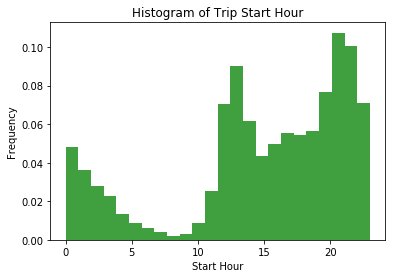

In [44]:
plt.hist(df['trip_start_hour'], len(df['trip_start_hour'].unique()), density=True, facecolor='g', alpha=0.75)
plt.xlabel('Start Hour')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Start Hour')

Text(0.5,1,'Histogram of Trip Day')

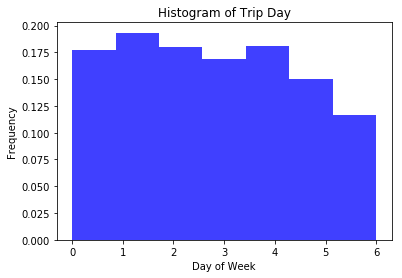

In [47]:
plt.hist(df['day_of_week'], len(df['day_of_week'].unique()), density=True, facecolor='b', alpha=0.75)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Day')